In [1]:
import pickle
import numpy as np
from tensorflow.contrib import learn
import tensorflow as tf
with open(r'F:\bug_triage\emb_and_dict\embedding100.pickle', 'rb') as f:
        emb = pickle.load(f)
        emb = np.asarray(emb)
        emb = emb.astype(np.float32)
with open(r'F:\bug_triage\emb_and_dict\dict100.pickle', 'rb') as f:
    vocab = pickle.load(f)


In [2]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords

def load_data_and_labels(data_file):
    df = pd.read_csv(data_file, encoding='latin-1')
    text = df['x_input']
    label = df['y_label']
    x_text = [clean_str(sent) for sent in text]
    set_label = set(label)
    length = len(set_label)
    dic_label = dict(zip(range(len(set_label)), set_label))
    y = list()
    for name in label:
        l = [0] * length
        for k, v in dic_label.items():
            if name is v:
                l[k] = 1
                y.append(l)
    return [x_text, np.asarray(y)]

def clean_str(string):
    stop_word = stopwords.words("english")                #停词表
    porter=nltk.PorterStemmer()                           #词干提取器
    string = re.sub(r"\(.*?\)", " ", string)
    string = re.sub(r'[^a-zA-Z \']', " ", string)
    string = [porter.stem(w) for w in string.split() if w not in stop_word]
    string = " ".join(string)
    return string.lower()

In [3]:
x_text,y = load_data_and_labels(r"F:\post graduate\dataset\filted_data.csv")

In [32]:
x_text

['eclips platform team usabl issu extern editor',
 'eclips platform team open repositori resourc honor type',
 'eclips platform team sync indic delet',
 'eclips platform team need better error messag catch read resourc',
 'eclips platform team api vcm event notif',
 'eclips platform team cc discuss local version',
 'eclips platform team auto merg button',
 'eclips platform team look gender chang case',
 'eclips platform team workspac file',
 'eclips platform team perform refresh',
 'eclips platform team cv declar version creat use rtag',
 'eclips platform team internation',
 "eclips platform team can't replac team stream switch repositori",
 'eclips platform team should delet properti vcm api',
 'eclips platform team delet team stream lock vcm api',
 'eclips platform team cv modif timestamp',
 'eclips platform team term version confus work cv',
 'eclips platform team vcm core getignor use one resourc effici',
 'eclips platform team need way tag sourc folder packag singl file cv',
 'ecl

In [13]:
vocab_processor = learn.preprocessing.VocabularyProcessor(10)
vocab_processor.fit(vocab)
x = np.array(list(vocab_processor.transform(x_text)))

In [19]:
x[2]

array([    0,  3026,   139, 19385, 90330,     0,     0,     0,     0,
           0], dtype=int64)

In [31]:
count = 0
for i in vocab:
    if i =='eclipse':
        print(count)
    count +=1

12149


In [26]:
len(vocab_processor.vocabulary_)

370847

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import manifold, datasets, decomposition, ensemble

In [4]:
digits = datasets.load_digits(n_class=5)
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)
print(type(y))

(901, 64)
(901,)
<class 'numpy.ndarray'>


In [3]:
def plot_embedding_2d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)
    print("x_min:",x_min,"x_max:",x_max,"X:",X[:5])
    #降维后的坐标为（X[i, 0], X[i, 1]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

#%%
#将降维后的数据可视化,3维
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

In [5]:
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)


Computing t-SNE embedding
(901, 3)


x_min: [-38.29364 -35.81575] x_max: [39.656834 40.848545] X: [[0.65078366 0.8933643 ]
 [0.49327794 0.15378854]
 [0.5065952  0.32019153]
 [0.21787535 0.60203695]
 [0.74037796 0.3527268 ]]


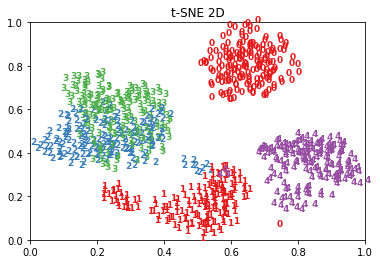

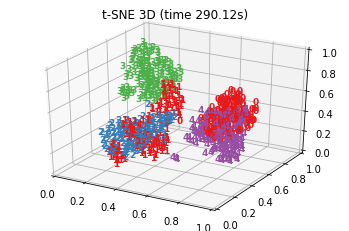

In [21]:
plot_embedding_2d(X_tsne[:,0:2],"t-SNE 2D")
plot_embedding_3d(X_tsne,"t-SNE 3D (time %.2fs)" %(time() - t0))

In [3]:
import os
os.getcwd()
os.chdir(r'F:\post graduate\dataset')

In [4]:
os.getcwd()

'F:\\post graduate\\dataset'